<a href="https://colab.research.google.com/github/plajuan/ML_Study/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solved Exercise

## Introduction

In this exercise, we want to predict which species a flower belongs to. To do this, we will examine various physical characteristics of flowers, such as petal length and width.

## Data

*   Number of observations = 150
*   Number of independent variables = 4
  1.   sepal_length = sepal length (cm)
  2.   sepal_width = sepal width (cm)
  1.   petal_length = petal length (cm)
  2.   petal_width = petal width (cm)
*   Number of dependent variables = 1
  1.   species = species (the flower may belong to one of three species, 'setosa', 'versicolor' and 'virginica')

Data available at: [seaborn library](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)

**Note**: The dependent and independent variables are defined specifically using the information in the exercise's introduction. If in the introduction we were asked, for example, to predict petal lengths using the other variables, the dependent variable would be 'petal_length' and not 'species'.

## Example

The first observation in the dataset that we will see in the Solution - the first row in the table that appears after doing `df` - refers to a flower that:

*   Has sepals with a length of `5.1` cm
*   Has sepals with a width of `3.5` cm
*   Has petals with a length of `1.4` cm
*   Has petals with a length of `0.2` cm
*   Belongs to the `setosa` species

# Solution

1.   Prepare data
1.   Explore data
2.   Train the model
2.   Evaluate the model

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Note**: If `FutureWarning` appears while you are importing the libraries, do not worry. This message appears associated with a library and serves only to inform you that some changes are ocurring in that library.

## 1. Prepare data

1.   Import data
2.   Remove observations with missing data

In [2]:
# Import data
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


*   The import was successful

In [3]:
# Check for missing data
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


## 2. Explore data

1.   Detect errors and anomalies
2.   View relationships between variables
  *   **Hypothesis**: `if the species are different, then their physical characteristics are different`. If the hypothesis is true, detecting patterns in the physical characteristics of flowers can be a good way to predict which species a flower belongs to.

In [4]:
# Check for errors or anomalies
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


*   There do not seem to be any obvious errors or anomalies

<Axes: xlabel='species', ylabel='sepal_length'>

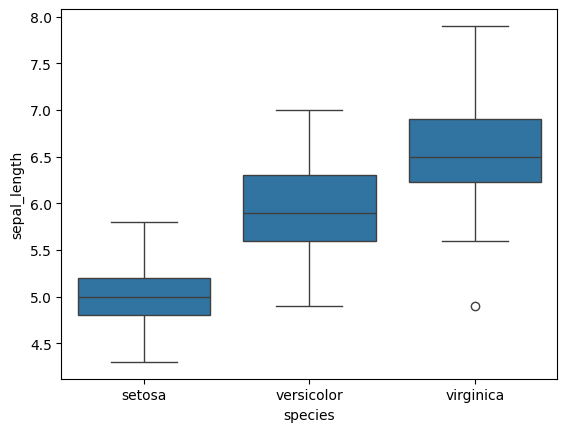

In [5]:
# View relationship between species and sepal length
sns.boxplot(x='species', y='sepal_length', data=df)

*   There seem to be differences in the sepal lengths for each of the species.
*   The 'virginica' species is the one with the greatest sepal length (average length of around 2 cm).
*   The 'setosa' species is the one with the smallest sepal length (average length of around 0.25 cm).

<Axes: xlabel='species', ylabel='sepal_width'>

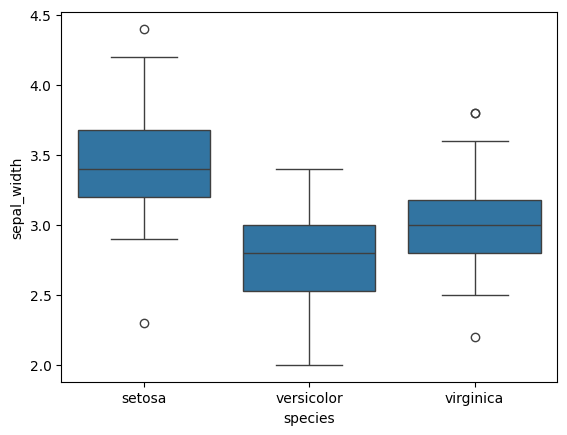

In [6]:
# View relationship between species and sepal width
sns.boxplot(x='species', y='sepal_width', data=df)

*   The differences are not as evident as in the previous case
*   On average, the 'versicolor' and 'virginica' species have similar values
*   The 'setosa' species stands out because it has a greater average width than the other species
*   Using sepal length to predict which species a flower belongs to seems to be more effective because there are greater differences between the flower species within this variable.

<Axes: xlabel='species', ylabel='petal_length'>

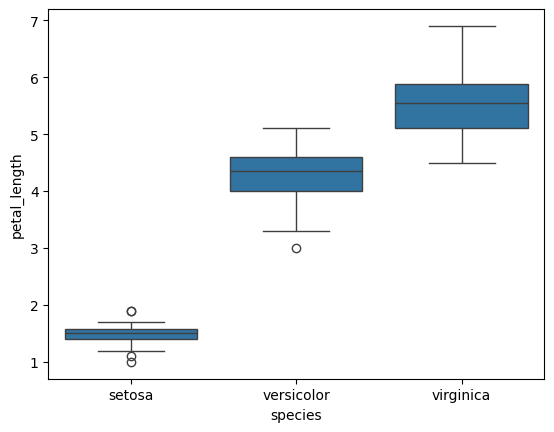

In [7]:
# View relationship between species and petal length
sns.boxplot(x='species', y='petal_length', data=df)

*   The species seem to differ in terms of petal length
*   The 'setosa' species has a smaller petal length than the other species. In fact, no other species has petals with a similar length to the 'setosa' species (whose values lie approximately between 0.5 and 2 cm).
*   The 'virginica' species has a greater petal length than the 'versicolor' species.
*   Petal length appears to be a useful variable for distinguishing between flower species

<Axes: xlabel='species', ylabel='petal_width'>

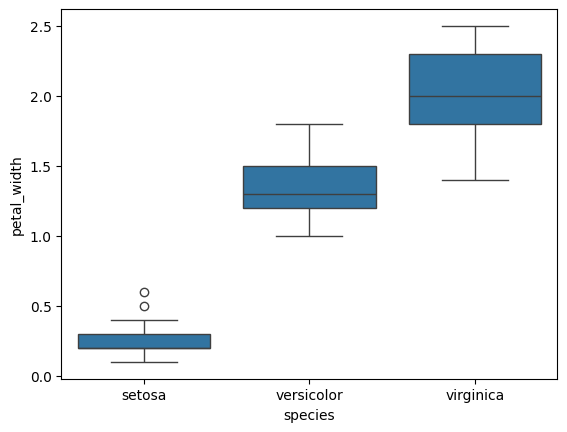

In [8]:
# View relationship between species and petal width
sns.boxplot(x='species', y='petal_width', data=df)

*   Same situation as before
*   The 'setosa' species has the smallest petal width of all the species
*   The 'virginica' species has the greatest average petal width
*   Knowing the width of the flowers seems to be important to predict which species a flower belongs to.

**Conclusions drawn from the data exploration**

*   There do not seem to be any obvious errors or anomalies
*   The initial hypothesis seems to hold and it is possible to use these variables to predict which species a flower belongs to.

## 3. Training the model

1.   Prepare the data in order to apply the algorithm
  *   Define the independent and dependent variables
  *   Split the data into training and testing datasets
2.   Define the algorithm to be used to train the model
1.   Train the model with the defined algorithm


In [9]:
# Define the independent and dependent variables
X = df.drop('species', axis=1)
y = df['species']

*   To train the model, all the independent variables must be numerical
*   In this case, since all the independent variables are numerical, all you have to do is save the entire table in `X`, except the 'species' column (this is why we used the `drop` function)

In [10]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

*   This function randomly splits the data between the training and testing datasets
*   In order for this division to always be equal, we define the `random_state` argument
*   That way, if anyone were to run code that is exactly the same as ours, they would get the same results
*   We used the number 0, but we could have used any other number

In [11]:
# Define the algorithm of the model
model = RandomForestClassifier(random_state=33)

*   We defined `random_state` for the reasons mentioned above

In [12]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=33)

## Evaluate the model

1.   Make predictions
2.   Evaluate the model based on the predictions made

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model using success rate
accuracy_score(y_test, y_pred)

0.9736842105263158

*   Our model has a success rate (`accuracy_score`) of approximately 97%
*   As we have already seen, our selection of variables allows us to distinguish the species from each other
*   As such, it would be expected that our model would have a good predictive capacity